In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import data_info, load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_a4a
from models import LogisticRegression
from ml_utils import optim_data, optim_bench, models_summary, diagnostic
from grid_search import run_solvers, run_bench, grid_search

In [2]:
C = 0.5
# sgd_steps = (1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001)
sgd_steps = tuple(np.round(np.geomspace(0.005, 1, 11), 3))
# sgdd_steps = (1, 0.8, 0.5, 0.1, 0.05, 0.01)
sgdd_steps = tuple(np.round(np.geomspace(0.01, 1, 11), 3))
# momentum_steps = (0.9, 0.99)
# sls_steps = (1, 0.5, 0.1, 0.05, 0.01)
sls_steps = tuple(np.round(np.geomspace(0.01, 1, 7), 3))
armijo_damps = (0.3, 0.5, 0.7)
momentum_damps = (0.3, 0.5, 0.7)

print(f"""Fixed: {sgd_steps}
Decreasing: {sgdd_steps}
SLS: {sls_steps}
delta_a: {armijo_damps}
delta_m: {momentum_damps}""")

Fixed: (0.005, 0.008, 0.014, 0.025, 0.042, 0.071, 0.12, 0.204, 0.347, 0.589, 1.0)
Decreasing: (0.01, 0.016, 0.025, 0.04, 0.063, 0.1, 0.158, 0.251, 0.398, 0.631, 1.0)
SLS: (0.01, 0.022, 0.046, 0.1, 0.215, 0.464, 1.0)
delta_a: (0.3, 0.5, 0.7)
delta_m: (0.3, 0.5, 0.7)


# w1a

In [3]:
data_w1a = load_w1a()
data_info(data_w1a)

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Train distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}
Test distribution: {-1.0: 0.9702360805550855, 1.0: 0.029763919444914536}


In [4]:
Mw1a_grid = (32, 64)
for i in Mw1a_grid:
    print(f"Iterations: {data_w1a[1].size / i}")

Iterations: 77.40625
Iterations: 38.703125


## Benchmark

In [5]:
benchw1a = run_bench(data_w1a, C)

benchw1a_data = optim_bench(benchw1a)

## Fine-tuning

In [6]:
#batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)
batchfixed_w1a1, _ = grid_search("SGD-Fixed", C, data_w1a, (data_w1a[1].size,), sgd_steps, do_parallel=False)

{'batch': 2477, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 1.577362
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.970236
Objective function: 0.464614
Grad norm: 0.000564
Sol norm: 0.667389
Run-time (seconds): 0.015624
Epochs: 12


In [7]:
#sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)
sgdfixed_w1a1, _ = grid_search("SGD-Fixed", C, data_w1a, Mw1a_grid, sgd_steps, n_jobs=7)
print("% ----- %")
#sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)
sgddecre_w1a1, _ = grid_search("SGD-Decreasing", C, data_w1a, Mw1a_grid, sgdd_steps, n_jobs=7)
print("% ----- %")
#sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)
sgdm_w1a1, _ = grid_search("SGDM", C, data_w1a, Mw1a_grid, sgd_steps, n_jobs=7)

{'batch': 32, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 14.617287
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.970236
Objective function: 0.464615
Grad norm: 0.000879
Sol norm: 0.667293
Run-time (seconds): 0.468251
Epochs: 27
% ----- %
{'batch': 32, 'alpha': 0.1, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 10.263159
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.970236
Objective function: 0.464614
Grad norm: 0.000890
Sol norm: 0.667605
Run-time (seconds): 0.236748
Epochs: 14
% ----- %
{'batch': 32, 'alpha': 0.042, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 20.563812
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.970236
Objective function: 0.464615
Grad norm: 0.000973
Sol norm: 0.666975
Run-time (seconds): 1.877896
Epochs: 108


In [8]:
#sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)
sgdarmijo_w1a1, _ = grid_search("SGD-Armijo", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=9)
print("% ------ %")
#mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)
mslc_w1a1, _ = grid_search("MSL-SGDM-C", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=9)
print("% ------ %")
#mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)
mslr_w1a1, _ = grid_search("MSL-SGDM-R", C, data_w1a, Mw1a_grid, sls_steps, delta_a=armijo_damps, n_jobs=9)

{'batch': 64, 'alpha': 0.01, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 50.160634
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.970236
Objective function: 0.464615
Grad norm: 0.000857
Sol norm: 0.667250
Run-time (seconds): 0.825241
Epochs: 42
% ------ %
{'batch': 32, 'alpha': 0.022, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.7}
Grid search run-time (seconds): 145.479858
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.970236
Objective function: 0.464615
Grad norm: 0.000852
Sol norm: 0.667133
Run-time (seconds): 1.156346
Epochs: 44
% ------ %
{'batch': 64, 'alpha': 0.046, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 50.259143
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.970236
Objective function: 0.464615
Grad norm: 0.000961
Sol norm: 0.667560
Run-time (seconds): 2.918680
Epochs: 183


In [9]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
1,Newton-CG,0.5,NaN,NaN,NaN,0.667394,0.464614,0.000046,NaN,6,0.970933,0.970236,0.5,0.5,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.667395,0.464614,0.000009,NaN,7,0.970933,0.970236,0.5,0.5,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.667406,0.464614,0.000023,NaN,7,0.970933,0.970236,0.5,0.5,NaN,NaN
3,BatchGD-Fixed,0.5,2477.0,1.000,0.0,0.667389,0.464614,0.000564,0.015624,12,0.970933,0.970236,0.5,0.5,0.0,0.0
5,SGD-Decreasing,0.5,32.0,0.100,0.0,0.667605,0.464614,0.000890,0.236748,14,0.970933,0.970236,0.5,0.5,0.0,0.0
8,MSL-SGDM-C,0.5,32.0,0.022,0.9,0.667133,0.464615,0.000852,1.156346,44,0.970933,0.970236,0.5,0.5,0.0,77.0
7,SGD-Armijo,0.5,64.0,0.010,0.0,0.667250,0.464615,0.000857,0.825241,42,0.970933,0.970236,0.5,0.5,0.0,0.0
4,SGD-Fixed,0.5,32.0,0.008,0.0,0.667293,0.464615,0.000879,0.468251,27,0.970933,0.970236,0.5,0.5,0.0,0.0
6,SGDM,0.5,32.0,0.042,0.9,0.666975,0.464615,0.000973,1.877896,108,0.970933,0.970236,0.5,0.5,0.0,0.0
9,MSL-SGDM-R,0.5,64.0,0.046,0.9,0.667560,0.464615,0.000961,2.918680,183,0.970933,0.970236,0.5,0.5,0.0,0.0


In [10]:
print(test_w1a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & 6 & NaN & 0.667394 & 0.464614 & 0.000046 & 0.970236 \\
CG & 7 & NaN & 0.667395 & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & 7 & NaN & 0.667406 & 0.464614 & 0.000023 & 0.970236 \\
BatchGD-Fixed & 12 & 0.015624 & 0.667389 & 0.464614 & 0.000564 & 0.970236 \\
SGD-Decreasing & 14 & 0.236748 & 0.667605 & 0.464614 & 0.000890 & 0.970236 \\
MSL-SGDM-C & 44 & 1.156346 & 0.667133 & 0.464615 & 0.000852 & 0.970236 \\
SGD-Armijo & 42 & 0.825241 & 0.667250 & 0.464615 & 0.000857 & 0.970236 \\
SGD-Fixed & 27 & 0.468251 & 0.667293 & 0.464615 & 0.000879 & 0.970236 \\
SGDM & 108 & 1.877896 & 0.666975 & 0.464615 & 0.000973 & 0.970236 \\
MSL-SGDM-R & 183 & 2.918680 & 0.667560 & 0.464615 & 0.000961 & 0.970236 \\
\bottomrule
\end{tabular}



## SGD

In [11]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, (data_w1a[1].size,))

Grid search run-time (seconds): 2.963306


In [12]:
# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, Mw1a_grid)
# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, data_w1a, Mw1a_grid)
# SGDM
sgdm_w1a = run_solvers("SGDM", C, data_w1a, Mw1a_grid)

Grid search run-time (seconds): 3.835924
Grid search run-time (seconds): 6.876075
Grid search run-time (seconds): 9.432334


In [13]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, data_w1a, Mw1a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, data_w1a, Mw1a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, data_w1a, Mw1a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 33.209662
Grid search run-time (seconds): 30.110356
Grid search run-time (seconds): 24.224953


In [14]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [15]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
3,BatchGD-Fixed,0.5,2477.0,1.00,0.0,0.667394,0.464614,4.113326e-17,0.041163,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000
1,Newton-CG,0.5,NaN,NaN,NaN,0.667394,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.667395,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.667406,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,NaN,NaN
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.667384,0.464614,3.409068e-05,0.948047,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000
4,BatchGD-Fixed,0.5,2477.0,0.10,0.0,0.667393,0.464614,8.167528e-05,0.041124,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.667380,0.464614,1.351881e-04,0.620920,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000
20,MSL-SGDM-C,0.5,64.0,0.01,0.9,0.667216,0.464614,3.254910e-04,2.359422,200,0.970933,0.970236,0.500000,0.500000,0.00,38.000
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.667402,0.464614,3.245760e-04,0.629833,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000
17,SGD-Armijo,0.5,64.0,0.01,0.0,0.667402,0.464614,3.245760e-04,2.187786,200,0.970933,0.970236,0.500000,0.500000,0.00,0.000


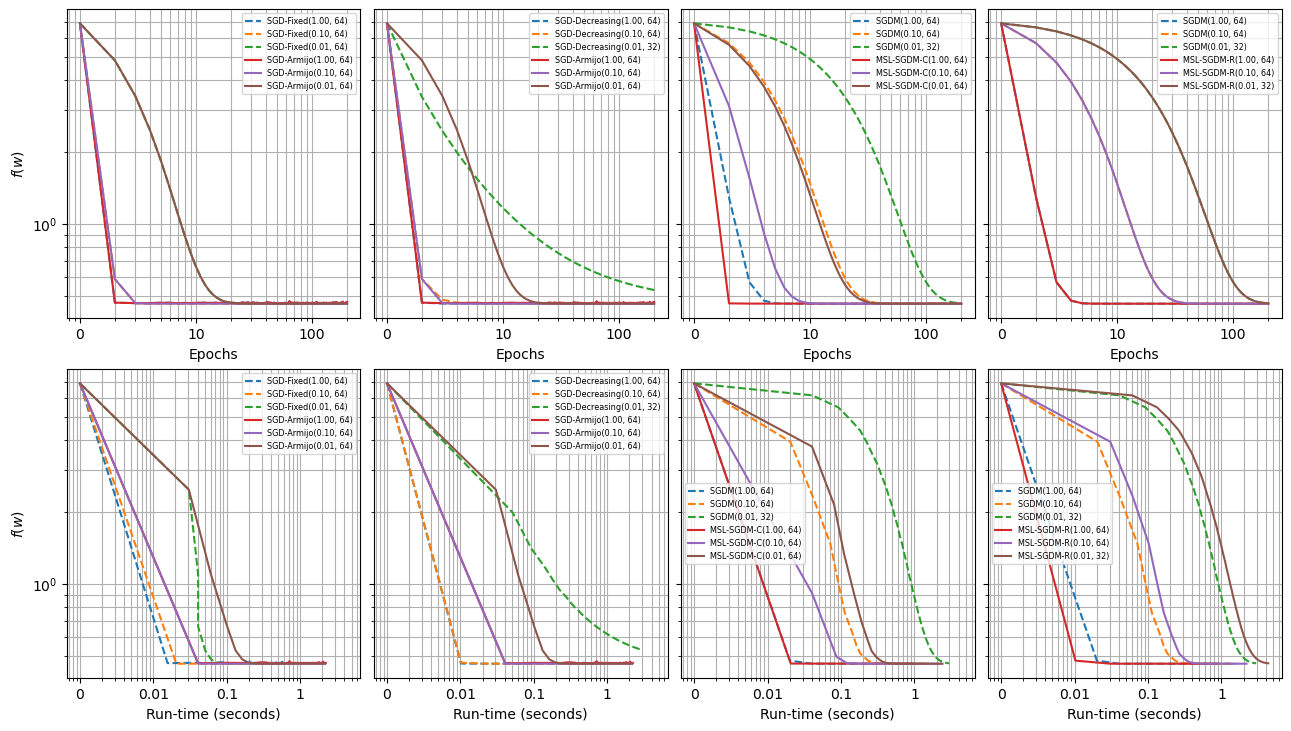

In [16]:
diagnostic([sgdfixed_w1a, sgddecre_w1a, sgdm_w1a, sgdarmijo_w1a, mslc_w1a, mslr_w1a])
plt.savefig("./plots/w1a-diagnostic.pdf")

# w3a

In [17]:
data_w3a = load_w3a()
data_info(data_w3a)

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Train distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}
Test distribution: {-1.0: 0.9702031804090372, 1.0: 0.029796819590962823}


In [18]:
Mw3a_grid = (64, 128)
for i in Mw3a_grid:
    print(f"Iterations: {data_w3a[1].size / i}")

Iterations: 76.75
Iterations: 38.375


## Benchmark

In [19]:
benchw3a = run_bench(data_w3a, C)

benchw3a_data = optim_bench(benchw3a)

## Fine-tuning

In [20]:
batchfixed_w3a1, _ = grid_search("SGD-Fixed", C, data_w3a, (data_w3a[1].size,), sgd_steps)

{'batch': 4912, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.042664
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.970203
Objective function: 0.462742
Grad norm: 0.000564
Sol norm: 0.666635
Run-time (seconds): 0.010296
Epochs: 12


In [21]:
sgdfixed_w3a1, _ = grid_search("SGD-Fixed", C, data_w3a, Mw3a_grid, sgd_steps)
print("% ----- %")
sgddecre_w3a1, _ = grid_search("SGD-Decreasing", C, data_w3a, Mw3a_grid, sgdd_steps)
print("% ----- %")
sgdm_w3a1, _ = grid_search("SGDM", C, data_w3a, Mw3a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 15.119320
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000826
Sol norm: 0.666559
Run-time (seconds): 0.187848
Epochs: 27
% ----- %
{'batch': 64, 'alpha': 0.063, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 10.872312
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000858
Sol norm: 0.666746
Run-time (seconds): 0.281906
Epochs: 15
% ----- %
{'batch': 64, 'alpha': 0.071, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 19.706097
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000861
Sol norm: 0.666868
Run-time (seconds): 1.130000
Epochs: 61


In [22]:
sgdarmijo_w3a1, _ = grid_search("SGD-Armijo", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ----- %")
mslc_w3a1, _ = grid_search("MSL-SGDM-C", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_w3a1, _ = grid_search("MSL-SGDM-R", C, data_w3a, Mw3a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 128, 'alpha': 0.022, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 49.479221
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000776
Sol norm: 0.666633
Run-time (seconds): 0.534205
Epochs: 21
% ----- %
{'batch': 64, 'alpha': 0.022, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.5}
Grid search run-time (seconds): 135.801442
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000836
Sol norm: 0.666495
Run-time (seconds): 0.712571
Epochs: 26
% ----- %
{'batch': 128, 'alpha': 0.046, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 43.678301
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.970203
Objective function: 0.462743
Grad norm: 0.000983
Sol norm: 0.666902
Run-time (seconds): 3.096619
Epochs: 172


In [23]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
1,Newton-CG,0.5,NaN,NaN,NaN,0.666640,0.462742,0.000011,NaN,6,0.970888,0.970203,0.5,0.5,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.666648,0.462742,0.000022,NaN,7,0.970888,0.970203,0.5,0.5,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.666658,0.462742,0.000033,NaN,7,0.970888,0.970203,0.5,0.5,NaN,NaN
3,BatchGD-Fixed,0.5,4912.0,1.000,0.0,0.666635,0.462742,0.000564,0.010296,12,0.970888,0.970203,0.5,0.5,0.0,0.000000
7,SGD-Armijo,0.5,128.0,0.022,0.0,0.666633,0.462743,0.000776,0.534205,21,0.970888,0.970203,0.5,0.5,0.0,0.000000
4,SGD-Fixed,0.5,64.0,0.008,0.0,0.666559,0.462743,0.000826,0.187848,27,0.970888,0.970203,0.5,0.5,0.0,0.000000
8,MSL-SGDM-C,0.5,64.0,0.022,0.9,0.666495,0.462743,0.000836,0.712571,26,0.970888,0.970203,0.5,0.5,0.0,76.000000
6,SGDM,0.5,64.0,0.071,0.9,0.666868,0.462743,0.000861,1.130000,61,0.970888,0.970203,0.5,0.5,0.0,0.000000
5,SGD-Decreasing,0.5,64.0,0.063,0.0,0.666746,0.462743,0.000858,0.281906,15,0.970888,0.970203,0.5,0.5,0.0,0.000000
9,MSL-SGDM-R,0.5,128.0,0.046,0.9,0.666902,0.462743,0.000983,3.096619,172,0.970888,0.970203,0.5,0.5,0.0,0.017442


In [24]:
print(test_w3a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & 6 & NaN & 0.666640 & 0.462742 & 0.000011 & 0.970203 \\
CG & 7 & NaN & 0.666648 & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & 7 & NaN & 0.666658 & 0.462742 & 0.000033 & 0.970203 \\
BatchGD-Fixed & 12 & 0.010296 & 0.666635 & 0.462742 & 0.000564 & 0.970203 \\
SGD-Armijo & 21 & 0.534205 & 0.666633 & 0.462743 & 0.000776 & 0.970203 \\
SGD-Fixed & 27 & 0.187848 & 0.666559 & 0.462743 & 0.000826 & 0.970203 \\
MSL-SGDM-C & 26 & 0.712571 & 0.666495 & 0.462743 & 0.000836 & 0.970203 \\
SGDM & 61 & 1.130000 & 0.666868 & 0.462743 & 0.000861 & 0.970203 \\
SGD-Decreasing & 15 & 0.281906 & 0.666746 & 0.462743 & 0.000858 & 0.970203 \\
MSL-SGDM-R & 172 & 3.096619 & 0.666902 & 0.462743 & 0.000983 & 0.970203 \\
\bottomrule
\end{tabular}



## SGD

In [25]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, (data_w3a[1].size,))

Grid search run-time (seconds): 3.160374


In [26]:
# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, Mw3a_grid)
# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, data_w3a, Mw3a_grid)
# SGDM
sgdm_w3a = run_solvers("SGDM", C, data_w3a, Mw3a_grid)

Grid search run-time (seconds): 4.035022
Grid search run-time (seconds): 7.781705
Grid search run-time (seconds): 9.740104


In [27]:
# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, data_w3a, Mw3a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, data_w3a, Mw3a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, data_w3a, Mw3a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 34.204317
Grid search run-time (seconds): 32.290833
Grid search run-time (seconds): 25.926389


In [28]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [29]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
1,Newton-CG,0.5,NaN,NaN,NaN,0.666640,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,NaN,NaN
3,BatchGD-Fixed,0.5,4912.0,1.00,0.0,0.666640,0.462742,2.743891e-17,0.079588,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.666646,0.462742,1.677118e-05,3.085273,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000
2,CG,0.5,NaN,NaN,NaN,0.666648,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.666658,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,NaN,NaN
4,BatchGD-Fixed,0.5,4912.0,0.10,0.0,0.666639,0.462742,8.164157e-05,0.077824,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.666736,0.462742,1.231901e-04,0.690911,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.666776,0.462742,2.195998e-04,2.593456,200,0.970888,0.970203,0.500000,0.500000,0.000,38.000
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.666881,0.462742,3.214639e-04,0.684170,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000
17,SGD-Armijo,0.5,128.0,0.01,0.0,0.666881,0.462742,3.214639e-04,2.380635,200,0.970888,0.970203,0.500000,0.500000,0.000,0.000


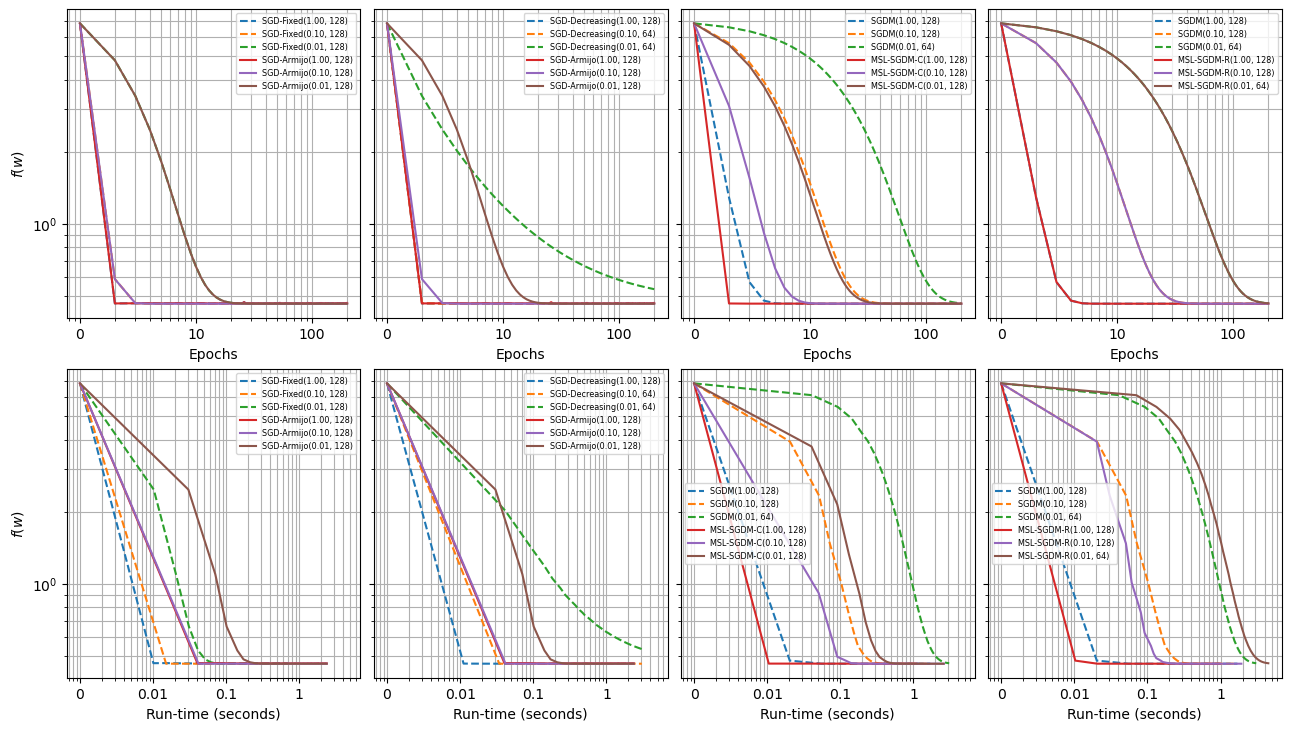

In [30]:
diagnostic([sgdfixed_w3a, sgddecre_w3a, sgdm_w3a, sgdarmijo_w3a, mslc_w3a, mslr_w3a])
plt.savefig("./plots/w3a-diagnostic.pdf")

# Phishing

In [31]:
data_phish = load_phishing()
data_info(data_phish)

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Train distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}
Test distribution: {-1: 0.4323835368611488, 1: 0.5676164631388512}


In [32]:
Mphish_grid = (64, 128)
for i in Mphish_grid:
    print(f"Iterations: {data_phish[1].size / i}")

Iterations: 138.1875
Iterations: 69.09375


## Benchmark

In [33]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## Fine-tuning

In [34]:
batchfixed_phish1, _ = grid_search("SGD-Fixed", C, data_phish, (data_phish[1].size,), sgd_steps)

{'batch': 8844, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.284863
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.567616
Objective function: 0.685065
Grad norm: 0.000534
Sol norm: 0.164001
Run-time (seconds): 0.010071
Epochs: 11


In [35]:
sgdfixed_phish1, _ = grid_search("SGD-Fixed", C, data_phish, Mphish_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_phish1, _ = grid_search("SGD-Decreasing", C, data_phish, Mphish_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_phish1, _ = grid_search("SGDM", C, data_phish, Mphish_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 24.185369
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.903664
Objective function: 0.687962
Grad norm: 0.070602
Sol norm: 0.149831
Run-time (seconds): 11.163498
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.631, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 17.674397
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.567616
Objective function: 0.685065
Grad norm: 0.000565
Sol norm: 0.163747
Run-time (seconds): 1.354989
Epochs: 39
% ----- %
{'batch': 64, 'alpha': 0.042, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 19.841863
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.567616
Objective function: 0.685065
Grad norm: 0.000649
Sol norm: 0.163887
Run-time (seconds): 1.640694
Epochs: 49


In [36]:
sgdarmijo_phish1, _ = grid_search("SGD-Armijo", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ----- %")
mslc_phish1, _ = grid_search("MSL-SGDM-C", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_phish1, _ = grid_search("MSL-SGDM-R", C, data_phish, Mphish_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 64, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 78.426188
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.903664
Objective function: 0.687962
Grad norm: 0.070602
Sol norm: 0.149831
Run-time (seconds): 32.509827
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 207.132826
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.699683
Objective function: 0.686425
Grad norm: 0.049105
Sol norm: 0.145904
Run-time (seconds): 17.217646
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.046, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.0}
Grid search run-time (seconds): 61.567620
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.567616
Objective function: 0.685065
Grad norm: 0.000578
Sol norm: 0.164120
Run-time (seconds): 2.313895
Epochs: 48


In [37]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
4,SGD-Fixed,0.5,64.0,1.000,0.0,0.149831,0.687962,7.060248e-02,11.163498,600,0.899480,0.903664,0.894990,0.89757,0.000000,0.000000
7,SGD-Armijo,0.5,64.0,1.000,0.0,0.149831,0.687962,7.060248e-02,32.509827,600,0.899480,0.903664,0.894990,0.89757,0.000000,0.000000
8,MSL-SGDM-C,0.5,128.0,1.000,0.9,0.145904,0.686425,4.910482e-02,17.217646,600,0.697196,0.699683,0.660325,0.65272,1.075000,69.041667
1,Newton-CG,0.5,NaN,NaN,NaN,0.164188,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.50000,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.164196,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.50000,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.164214,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.50000,NaN,NaN
3,BatchGD-Fixed,0.5,8844.0,1.000,0.0,0.164001,0.685065,5.343408e-04,0.010071,11,0.554274,0.567616,0.500000,0.50000,0.000000,0.000000
5,SGD-Decreasing,0.5,64.0,0.631,0.0,0.163747,0.685065,5.648811e-04,1.354989,39,0.554274,0.567616,0.500000,0.50000,0.000000,0.000000
9,MSL-SGDM-R,0.5,64.0,0.046,0.9,0.164120,0.685065,5.784549e-04,2.313895,48,0.554274,0.567616,0.500000,0.50000,0.208333,15.875000
6,SGDM,0.5,64.0,0.042,0.9,0.163887,0.685065,6.493886e-04,1.640694,49,0.554274,0.567616,0.500000,0.50000,0.000000,0.000000


In [38]:
print(test_phish[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
SGD-Fixed & 600 & 11.163498 & 0.149831 & 0.687962 & 0.070602 & 0.903664 \\
SGD-Armijo & 600 & 32.509827 & 0.149831 & 0.687962 & 0.070602 & 0.903664 \\
MSL-SGDM-C & 600 & 17.217646 & 0.145904 & 0.686425 & 0.049105 & 0.699683 \\
Newton-CG & 5 & NaN & 0.164188 & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & 5 & NaN & 0.164196 & 0.685065 & 0.000008 & 0.567616 \\
CG & 6 & NaN & 0.164214 & 0.685065 & 0.000023 & 0.567616 \\
BatchGD-Fixed & 11 & 0.010071 & 0.164001 & 0.685065 & 0.000534 & 0.567616 \\
SGD-Decreasing & 39 & 1.354989 & 0.163747 & 0.685065 & 0.000565 & 0.567616 \\
MSL-SGDM-R & 48 & 2.313895 & 0.164120 & 0.685065 & 0.000578 & 0.567616 \\
SGDM & 49 & 1.640694 & 0.163887 & 0.685065 & 0.000649 & 0.567616 \\
\bottomrule
\end{tabular}



## SGD

In [39]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, (data_phish[1].size,))

Grid search run-time (seconds): 3.366502


In [40]:
# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, Mphish_grid)
# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, Mphish_grid)
# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, Mphish_grid)

Grid search run-time (seconds): 9.209856
Grid search run-time (seconds): 17.039155
Grid search run-time (seconds): 16.996994


In [41]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, Mphish_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, Mphish_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, Mphish_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 61.050575
Grid search run-time (seconds): 64.926882
Grid search run-time (seconds): 52.942552


In [42]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [43]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
1,Newton-CG,0.5,NaN,NaN,NaN,0.164188,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,NaN,NaN
3,BatchGD-Fixed,0.5,8844.0,1.00,0.0,0.164188,0.685065,9.782834e-18,0.145130,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.164188,0.685065,2.870093e-06,3.100032,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.164196,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.164214,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,NaN,NaN
4,BatchGD-Fixed,0.5,8844.0,0.10,0.0,0.164175,0.685065,3.840453e-05,0.144790,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.164180,0.685065,5.852495e-05,3.094684,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000
20,MSL-SGDM-C,0.5,128.0,0.01,0.9,0.164208,0.685065,9.414330e-05,4.958390,200,0.554274,0.567616,0.500000,0.500000,0.010,69.025
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.164259,0.685065,2.380768e-04,2.093704,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000
14,SGD-Armijo,0.5,128.0,0.01,0.0,0.164259,0.685065,2.380768e-04,4.298652,200,0.554274,0.567616,0.500000,0.500000,0.000,0.000


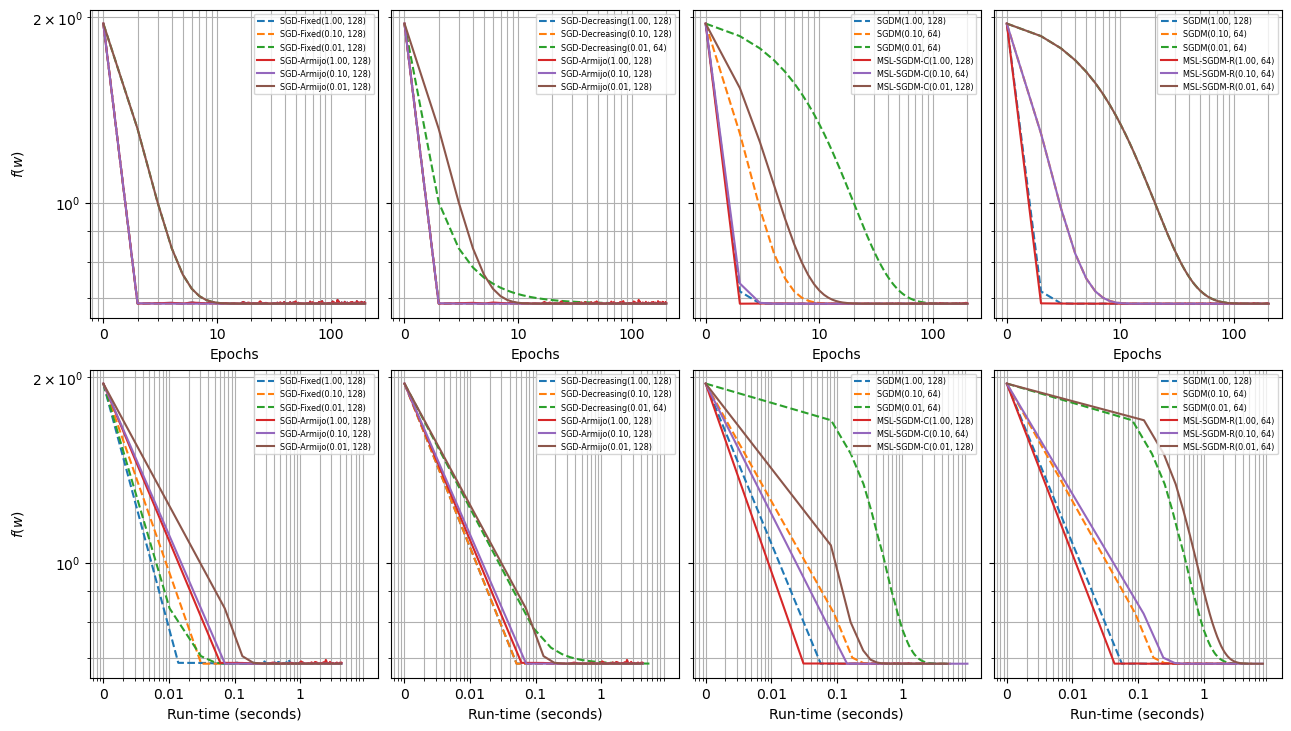

In [44]:
diagnostic([sgdfixed_phish, sgddecre_phish, sgdm_phish, sgdarmijo_phish, mslc_phish, mslr_phish])
plt.savefig("./plots/phish-diagnostic.pdf")

# a2a

In [46]:
data_a2a = load_a2a()
data_info(data_a2a)

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Train distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}
Test distribution: {-1.0: 0.7600673356218642, 1.0: 0.23993266437813573}


In [47]:
Ma2a_grid = (32, 64)
for i in Ma2a_grid:
    print(f"Iterations: {data_a2a[1].size / i}")

Iterations: 70.78125
Iterations: 35.390625


## Benchmark

In [48]:
bencha2a = run_bench(data_a2a, C)

bencha2a_data = optim_bench(bencha2a)

## Fine-tuning

In [49]:
batchfixed_a2a1, _ = grid_search("SGD-Fixed", C, data_a2a, (data_a2a[1].size,), sgd_steps)

{'batch': 2265, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 1.955258
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.822386
Objective function: 0.594416
Grad norm: 0.363976
Sol norm: 0.355752
Run-time (seconds): 0.123481
Epochs: 600


In [50]:
sgdfixed_a2a1, _ = grid_search("SGD-Fixed", C, data_a2a, Ma2a_grid, sgd_steps)
print("% ------- %")
sgddecre_a2a1, _ = grid_search("SGD-Decreasing", C, data_a2a, Ma2a_grid, sgdd_steps)
print("% ------- %")
sgdm_a2a1, _ = grid_search("SGDM", C, data_a2a, Ma2a_grid, sgd_steps)

{'batch': 64, 'alpha': 0.347, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 11.684900
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.765184
Objective function: 0.569481
Grad norm: 0.133874
Sol norm: 0.413794
Run-time (seconds): 4.474010
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 0.251, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 9.344708
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.760265
Objective function: 0.564027
Grad norm: 0.000946
Sol norm: 0.439216
Run-time (seconds): 0.248697
Epochs: 31
% ------- %
{'batch': 64, 'alpha': 0.589, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 19.039618
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.760430
Objective function: 0.564436
Grad norm: 0.038564
Sol norm: 0.428972
Run-time (seconds): 4.702097
Epochs: 600


In [51]:
sgdarmijo_a2a1, _ = grid_search("SGD-Armijo", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ------- %")
mslc_a2a1, _ = grid_search("MSL-SGDM-C", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ------- %")
mslr_a2a1, _ = grid_search("MSL-SGDM-R", C, data_a2a, Ma2a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 64, 'alpha': 0.464, 'beta': 0.0, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 48.424641
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.766075
Objective function: 0.570790
Grad norm: 0.143227
Sol norm: 0.416947
Run-time (seconds): 7.588217
Epochs: 600
% ------- %
{'batch': 64, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.7}
Grid search run-time (seconds): 138.070865
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.781291
Objective function: 0.577631
Grad norm: 0.225478
Sol norm: 0.395984
Run-time (seconds): 8.578536
Epochs: 600
% ------- %
{'batch': 32, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.5, 'delta_m': 0.0}
Grid search run-time (seconds): 56.271585
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.762015
Objective function: 0.566502
Grad norm: 0.094155
Sol norm: 0.410532
Run-time (seconds): 16.498671
Epochs: 600


In [52]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
3,BatchGD-Fixed,0.5,2265.0,1.000,0.0,0.355752,0.594416,0.363976,0.123481,600,0.805740,0.822386,0.661688,0.678397,0.000000,0.000
8,MSL-SGDM-C,0.5,64.0,1.000,0.9,0.395984,0.577631,0.225478,8.578536,600,0.772627,0.781291,0.551562,0.547853,7.216667,36.025
7,SGD-Armijo,0.5,64.0,0.464,0.0,0.416947,0.570790,0.143227,7.588217,600,0.754525,0.766075,0.514565,0.512943,0.000000,0.000
4,SGD-Fixed,0.5,64.0,0.347,0.0,0.413794,0.569481,0.133874,4.474010,600,0.753642,0.765184,0.512817,0.511038,0.000000,0.000
9,MSL-SGDM-R,0.5,32.0,1.000,0.9,0.410532,0.566502,0.094155,16.498671,600,0.750110,0.762015,0.505824,0.504200,8.150000,5.985
6,SGDM,0.5,64.0,0.589,0.9,0.428972,0.564436,0.038564,4.702097,600,0.748344,0.760430,0.501748,0.500851,0.000000,0.000
1,Newton-CG,0.5,NaN,NaN,NaN,0.438972,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.438961,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.438969,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,NaN,NaN
5,SGD-Decreasing,0.5,64.0,0.251,0.0,0.439216,0.564027,0.000946,0.248697,31,0.748344,0.760265,0.501748,0.500413,0.000000,0.000


In [53]:
print(test_a2a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
BatchGD-Fixed & 600 & 0.123481 & 0.355752 & 0.594416 & 0.363976 & 0.822386 \\
MSL-SGDM-C & 600 & 8.578536 & 0.395984 & 0.577631 & 0.225478 & 0.781291 \\
SGD-Armijo & 600 & 7.588217 & 0.416947 & 0.570790 & 0.143227 & 0.766075 \\
SGD-Fixed & 600 & 4.474010 & 0.413794 & 0.569481 & 0.133874 & 0.765184 \\
MSL-SGDM-R & 600 & 16.498671 & 0.410532 & 0.566502 & 0.094155 & 0.762015 \\
SGDM & 600 & 4.702097 & 0.428972 & 0.564436 & 0.038564 & 0.760430 \\
Newton-CG & 5 & NaN & 0.438972 & 0.564027 & 0.000004 & 0.760265 \\
CG & 12 & NaN & 0.438961 & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & 8 & NaN & 0.438969 & 0.564027 & 0.000012 & 0.760265 \\
SGD-Decreasing & 31 & 0.248697 & 0.439216 & 0.564027 & 0.000946 & 0.760265 \\
\bottomrule
\end{tabular}



## SGD

In [54]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, (data_a2a[1].size,))

Grid search run-time (seconds): 2.926588


In [55]:
# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, Ma2a_grid)
# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, data_a2a, Ma2a_grid)
# SGDM
sgdm_a2a = run_solvers("SGDM", C, data_a2a, Ma2a_grid)

Grid search run-time (seconds): 3.407269
Grid search run-time (seconds): 4.996749
Grid search run-time (seconds): 8.349607


In [56]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, data_a2a, Ma2a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, data_a2a, Ma2a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, data_a2a, Ma2a_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 29.131438
Grid search run-time (seconds): 25.523430
Grid search run-time (seconds): 20.291568


In [57]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [58]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
3,BatchGD-Fixed,0.5,2265.0,1.00,0.0,0.355752,0.594416,0.363976,0.030792,200,0.805740,0.822386,0.661688,0.678397,0.000,0.000
15,SGD-Armijo,0.5,64.0,1.00,0.0,0.380781,0.587533,0.273632,2.001115,200,0.776600,0.785054,0.566374,0.565392,2.825,0.000
18,MSL-SGDM-C,0.5,64.0,1.00,0.9,0.355226,0.577885,0.227966,0.948039,200,0.759382,0.771686,0.525338,0.525719,2.760,35.055
21,MSL-SGDM-R,0.5,64.0,1.00,0.9,0.418580,0.564825,0.052776,0.784959,200,0.748344,0.760595,0.501748,0.501148,3.465,2.740
19,MSL-SGDM-C,0.5,64.0,0.10,0.9,0.437661,0.564039,0.005290,2.021709,200,0.748344,0.760298,0.501748,0.500481,0.110,35.190
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.427837,0.564390,0.021835,0.994102,200,0.748344,0.760298,0.501748,0.500481,0.000,0.000
16,SGD-Armijo,0.5,32.0,0.10,0.0,0.427837,0.564390,0.021835,3.771086,200,0.748344,0.760298,0.501748,0.500481,0.000,0.000
1,Newton-CG,0.5,NaN,NaN,NaN,0.438972,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.438961,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.438969,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,NaN,NaN


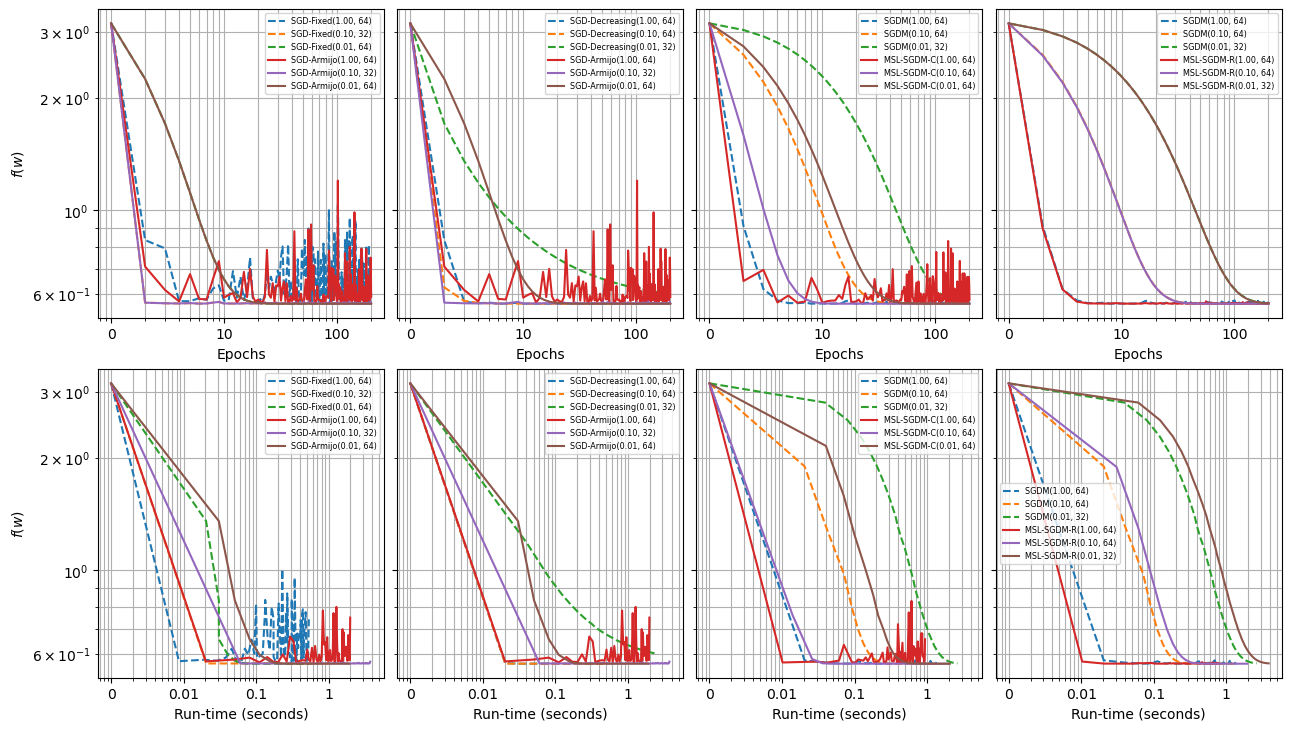

In [59]:
diagnostic([sgdfixed_a2a, sgddecre_a2a, sgdm_a2a, sgdarmijo_a2a, mslc_a2a, mslr_a2a]),
plt.savefig("./plots/a2a-diagnostic.pdf")

# Mushrooms

In [60]:
data_mush = load_mushrooms()
data_info(data_mush)

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Train distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}
Test distribution: {-1: 0.48123076923076924, 1: 0.5187692307692308}


In [61]:
Mmush_grid = (64, 128)
for i in Mmush_grid:
    print(f"Iterations: {data_mush[1].size / i}")

Iterations: 101.546875
Iterations: 50.7734375


## Benchmark

In [62]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## Fine-tuning

In [63]:
batchfixed_mush1, _ = grid_search("SGD-Fixed", C, data_mush, (data_mush[1].size,), sgd_steps)

{'batch': 6499, 'alpha': 0.589, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.338962
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.892923
Objective function: 0.517727
Grad norm: 0.000715
Sol norm: 0.635907
Run-time (seconds): 0.010201
Epochs: 22


In [64]:
sgdfixed_mush1, _ = grid_search("SGD-Fixed", C, data_mush, Mmush_grid, sgd_steps, n_jobs=8)
print("% ----- %")
sgddecre_mush1, _ = grid_search("SGD-Decreasing", C, data_mush, Mmush_grid, sgdd_steps, n_jobs=8)
print("% ----- %")
sgdm_mush1, _ = grid_search("SGDM", C, data_mush, Mmush_grid, sgd_steps, n_jobs=8)

{'batch': 64, 'alpha': 0.347, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 23.529325
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.951385
Objective function: 0.536690
Grad norm: 0.322894
Sol norm: 0.638411
Run-time (seconds): 9.415455
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.158, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 13.881649
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.893538
Objective function: 0.517727
Grad norm: 0.000829
Sol norm: 0.635971
Run-time (seconds): 1.010527
Epochs: 42
% ----- %
{'batch': 64, 'alpha': 0.589, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 24.014915
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.940308
Objective function: 0.523624
Grad norm: 0.185501
Sol norm: 0.632318
Run-time (seconds): 14.728387
Epochs: 600


In [65]:
sgdarmijo_mush1, _ = grid_search("SGD-Armijo", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=11)
print("% ----- %")
mslc_mush1, _ = grid_search("MSL-SGDM-C", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=11)
print("% ----- %")
mslr_mush1, _ = grid_search("MSL-SGDM-R", C, data_mush, Mmush_grid, sls_steps, delta_a=armijo_damps, n_jobs=11)

{'batch': 64, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.3, 'delta_m': 0.0}
Grid search run-time (seconds): 79.676733
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.951385
Objective function: 0.530812
Grad norm: 0.245386
Sol norm: 0.638957
Run-time (seconds): 28.272238
Epochs: 600
% ----- %
{'batch': 128, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 201.643169
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.953846
Objective function: 0.541510
Grad norm: 0.366329
Sol norm: 0.631125
Run-time (seconds): 15.484777
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.3, 'delta_m': 0.0}
Grid search run-time (seconds): 83.133965
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.926154
Objective function: 0.522395
Grad norm: 0.159555
Sol norm: 0.636756
Run-time (seconds): 32.368662
Epochs: 600


In [66]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
8,MSL-SGDM-C,0.5,128.0,1.000,0.9,0.631125,0.541510,0.366329,15.484777,600,0.961994,0.953846,0.962477,0.954591,46.818333,50.013333
7,SGD-Armijo,0.5,64.0,1.000,0.0,0.638957,0.530812,0.245386,28.272238,600,0.953839,0.951385,0.953113,0.950645,46.980000,0.000000
4,SGD-Fixed,0.5,64.0,0.347,0.0,0.638411,0.536690,0.322894,9.415455,600,0.960763,0.951385,0.960883,0.951663,0.000000,0.000000
6,SGDM,0.5,64.0,0.589,0.9,0.632318,0.523624,0.185501,14.728387,600,0.942607,0.940308,0.941335,0.938997,0.000000,0.000000
9,MSL-SGDM-R,0.5,64.0,1.000,0.9,0.636756,0.522395,0.159555,32.368662,600,0.930605,0.926154,0.928858,0.924292,13.720000,9.938333
5,SGD-Decreasing,0.5,64.0,0.158,0.0,0.635971,0.517727,0.000829,1.010527,42,0.895676,0.893538,0.892565,0.890219,0.000000,0.000000
1,Newton-CG,0.5,NaN,NaN,NaN,0.635933,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.635939,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.635930,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,NaN,NaN
3,BatchGD-Fixed,0.5,6499.0,0.589,0.0,0.635907,0.517727,0.000715,0.010201,22,0.895522,0.892923,0.892406,0.889580,0.000000,0.000000


In [67]:
print(test_mush[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
MSL-SGDM-C & 600 & 15.484777 & 0.631125 & 0.541510 & 0.366329 & 0.953846 \\
SGD-Armijo & 600 & 28.272238 & 0.638957 & 0.530812 & 0.245386 & 0.951385 \\
SGD-Fixed & 600 & 9.415455 & 0.638411 & 0.536690 & 0.322894 & 0.951385 \\
SGDM & 600 & 14.728387 & 0.632318 & 0.523624 & 0.185501 & 0.940308 \\
MSL-SGDM-R & 600 & 32.368662 & 0.636756 & 0.522395 & 0.159555 & 0.926154 \\
SGD-Decreasing & 42 & 1.010527 & 0.635971 & 0.517727 & 0.000829 & 0.893538 \\
Newton-CG & 7 & NaN & 0.635933 & 0.517726 & 0.000003 & 0.892923 \\
CG & 11 & NaN & 0.635939 & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & 10 & NaN & 0.635930 & 0.517726 & 0.000017 & 0.892923 \\
BatchGD-Fixed & 22 & 0.010201 & 0.635907 & 0.517727 & 0.000715 & 0.892923 \\
\bottomrule
\end{tabular}



## SGD

In [68]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, (data_mush[1].size,))

Grid search run-time (seconds): 3.154946


In [69]:
# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, Mmush_grid)
# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, Mmush_grid)
# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, Mmush_grid)

Grid search run-time (seconds): 4.982316
Grid search run-time (seconds): 11.868331
Grid search run-time (seconds): 12.376379


In [70]:
# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, Mmush_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, Mmush_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, Mmush_grid, delta_a=armijo_damps)

Grid search run-time (seconds): 45.837754
Grid search run-time (seconds): 45.998806
Grid search run-time (seconds): 36.408594


In [71]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [72]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
15,SGD-Armijo,0.5,64.0,1.00,0.0,0.608215,0.528012,0.134105,6.176421,200,0.934605,0.926769,0.933028,0.924931,46.600,0.000
18,MSL-SGDM-C,0.5,64.0,1.00,0.9,0.632028,0.520651,0.079480,2.915427,200,0.914448,0.910154,0.912106,0.907621,33.795,106.445
21,MSL-SGDM-R,0.5,64.0,1.00,0.9,0.647369,0.524559,0.194490,2.327073,200,0.898292,0.894154,0.894653,0.890118,20.270,9.710
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.636078,0.517727,0.002388,1.514382,200,0.895215,0.893538,0.892076,0.890173,0.000,0.000
20,MSL-SGDM-C,0.5,64.0,0.01,0.9,0.635989,0.517728,0.002675,7.058768,200,0.895215,0.893538,0.892076,0.890173,0.040,101.775
1,Newton-CG,0.5,NaN,NaN,NaN,0.635933,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.635939,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.635930,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,NaN,NaN
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.635941,0.517726,0.000056,2.207883,200,0.895522,0.892923,0.892406,0.889580,0.000,0.000
4,BatchGD-Fixed,0.5,6499.0,0.10,0.0,0.635932,0.517726,0.000046,0.093249,200,0.895522,0.892923,0.892406,0.889580,0.000,0.000


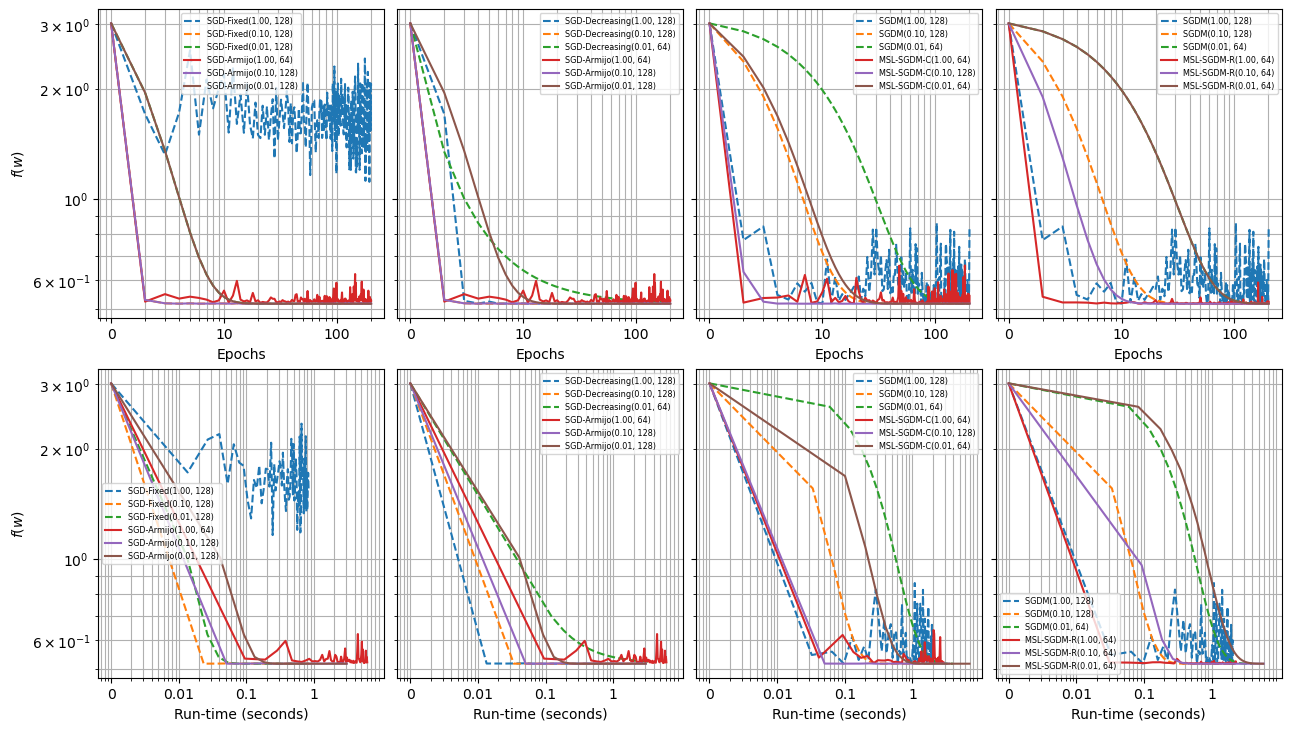

In [73]:
diagnostic([sgdfixed_mush, sgddecre_mush, sgdm_mush, sgdarmijo_mush, mslc_mush, mslr_mush]),
plt.savefig("./plots/mush-diagnostic.pdf")

# a4a

In [74]:
data_a4a = load_a4a()
data_info(data_a4a)

X_train = (4781, 120), y_train = (4781,)
X_test = (27780, 120), y_test = (27780,)
Train distribution: {-1.0: 0.7515164191591717, 1.0: 0.24848358084082828}
Test distribution: {-1.0: 0.7605111591072714, 1.0: 0.2394888408927286}


In [75]:
Ma4a_grid = (64, 128)
for i in Ma4a_grid:
    print(f"Iterations: {data_a4a[1].size / i}")

Iterations: 74.703125
Iterations: 37.3515625


## Benchmark

In [76]:
bencha4a = run_bench(data_a4a, C)

bencha4a_data = optim_bench(bencha4a)

## Fine-tuning

In [77]:
batchfixed_a4a1, _ = grid_search("SGD-Fixed", C, load_a4a(), (data_a4a[1].size,), sgd_steps)

{'batch': 4781, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 2.084455
Number of combinations analyzed: 11
-----
Solver: BatchGD-Fixed
Test score: 0.809575
Objective function: 0.579971
Grad norm: 0.300459
Sol norm: 0.376931
Run-time (seconds): 0.194899
Epochs: 600


In [78]:
sgdfixed_a4a1, _ = grid_search("SGD-Fixed", C, data_a4a, Ma4a_grid, sgd_steps)
print("% ----- %")
sgddecre_a4a1, _ = grid_search("SGD-Decreasing", C, data_a4a, Ma4a_grid, sgdd_steps)
print("% ----- %")
sgdm_a4a1, _ = grid_search("SGDM", C, data_a4a, Ma4a_grid, sgd_steps)

{'batch': 128, 'alpha': 0.008, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 14.951135
Number of combinations analyzed: 22
-----
Solver: SGD-Fixed
Test score: 0.760727
Objective function: 0.558974
Grad norm: 0.000467
Sol norm: 0.449949
Run-time (seconds): 0.283065
Epochs: 55
% ----- %
{'batch': 64, 'alpha': 0.1, 'beta': 0.0, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 10.121008
Number of combinations analyzed: 22
-----
Solver: SGD-Decreasing
Test score: 0.760727
Objective function: 0.558973
Grad norm: 0.000593
Sol norm: 0.449935
Run-time (seconds): 0.293199
Epochs: 17
% ----- %
{'batch': 64, 'alpha': 1.0, 'beta': 0.9, 'delta_a': 0.0, 'delta_m': 0.0}
Grid search run-time (seconds): 20.012687
Number of combinations analyzed: 22
-----
Solver: SGDM
Test score: 0.772858
Objective function: 0.566575
Grad norm: 0.177813
Sol norm: 0.394249
Run-time (seconds): 9.869528
Epochs: 600


In [79]:
sgdarmijo_a4a1, _ = grid_search("SGD-Armijo", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)
print("% ----- %")
mslc_a4a1, _ = grid_search("MSL-SGDM-C", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=10)
print("% ----- %")
mslr_a4a1, _ = grid_search("MSL-SGDM-R", C, data_a4a, Ma4a_grid, sls_steps, delta_a=armijo_damps, n_jobs=10)

{'batch': 64, 'alpha': 1.0, 'beta': 0.0, 'delta_a': 0.3, 'delta_m': 0.0}
Grid search run-time (seconds): 45.986326
Number of combinations analyzed: 42
-----
Solver: SGD-Armijo
Test score: 0.761915
Objective function: 0.574724
Grad norm: 0.187551
Sol norm: 0.380212
Run-time (seconds): 19.488739
Epochs: 600
% ----- %
{'batch': 64, 'alpha': 0.01, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.3}
Grid search run-time (seconds): 143.140180
Number of combinations analyzed: 126
-----
Solver: MSL-SGDM-C
Test score: 0.760727
Objective function: 0.558974
Grad norm: 0.000633
Sol norm: 0.450326
Run-time (seconds): 1.634708
Epochs: 41
% ----- %
{'batch': 128, 'alpha': 0.022, 'beta': 0.9, 'delta_a': 0.7, 'delta_m': 0.0}
Grid search run-time (seconds): 61.222724
Number of combinations analyzed: 42
-----
Solver: MSL-SGDM-R
Test score: 0.760727
Objective function: 0.558974
Grad norm: 0.000962
Sol norm: 0.450646
Run-time (seconds): 7.760144
Epochs: 399


In [80]:
fine_a4a_data = optim_data([batchfixed_a4a1, sgdfixed_a4a1, sgddecre_a4a1, sgdm_a4a1, sgdarmijo_a4a1, mslc_a4a1, mslr_a4a1])

test_a4a = models_summary(fine_a4a_data, bencha4a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])
test_a4a

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
3,BatchGD-Fixed,0.5,4781.0,1.000,0.0,0.376931,0.579971,0.300459,0.194899,600,0.801506,0.809575,0.621718,0.625296,0.000000,0.000000
6,SGDM,0.5,64.0,1.000,0.9,0.394249,0.566575,0.177813,9.869528,600,0.763439,0.772858,0.525117,0.527322,0.000000,0.000000
7,SGD-Armijo,0.5,64.0,1.000,0.0,0.380212,0.574724,0.187551,19.488739,600,0.752981,0.761915,0.503510,0.503497,5.921667,0.000000
1,Newton-CG,0.5,NaN,NaN,NaN,0.450068,0.558973,0.000003,NaN,5,0.752144,0.760727,0.501263,0.500451,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.450067,0.558973,0.000011,NaN,8,0.752144,0.760727,0.501263,0.500451,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.450062,0.558973,0.000020,NaN,12,0.752144,0.760727,0.501263,0.500451,NaN,NaN
5,SGD-Decreasing,0.5,64.0,0.100,0.0,0.449935,0.558973,0.000593,0.293199,17,0.752144,0.760727,0.501263,0.500451,0.000000,0.000000
4,SGD-Fixed,0.5,128.0,0.008,0.0,0.449949,0.558974,0.000467,0.283065,55,0.752144,0.760727,0.501263,0.500451,0.000000,0.000000
8,MSL-SGDM-C,0.5,64.0,0.010,0.9,0.450326,0.558974,0.000633,1.634708,41,0.752144,0.760727,0.501263,0.500451,0.000000,74.000000
9,MSL-SGDM-R,0.5,128.0,0.022,0.9,0.450646,0.558974,0.000962,7.760144,399,0.752144,0.760727,0.501263,0.500451,0.062657,1.932331


In [81]:
print(test_a4a[["Solver", "Epochs", "Run-time", "Sol norm", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Epochs & Run-time & Sol norm & l2-Loss & Grad norm & Test score \\
\midrule
BatchGD-Fixed & 600 & 0.194899 & 0.376931 & 0.579971 & 0.300459 & 0.809575 \\
SGDM & 600 & 9.869528 & 0.394249 & 0.566575 & 0.177813 & 0.772858 \\
SGD-Armijo & 600 & 19.488739 & 0.380212 & 0.574724 & 0.187551 & 0.761915 \\
Newton-CG & 5 & NaN & 0.450068 & 0.558973 & 0.000003 & 0.760727 \\
L-BFGS-B & 8 & NaN & 0.450067 & 0.558973 & 0.000011 & 0.760727 \\
CG & 12 & NaN & 0.450062 & 0.558973 & 0.000020 & 0.760727 \\
SGD-Decreasing & 17 & 0.293199 & 0.449935 & 0.558973 & 0.000593 & 0.760727 \\
SGD-Fixed & 55 & 0.283065 & 0.449949 & 0.558974 & 0.000467 & 0.760727 \\
MSL-SGDM-C & 41 & 1.634708 & 0.450326 & 0.558974 & 0.000633 & 0.760727 \\
MSL-SGDM-R & 399 & 7.760144 & 0.450646 & 0.558974 & 0.000962 & 0.760727 \\
\bottomrule
\end{tabular}



## SGD

In [82]:
# BatchGD-Fixed
batchfixed_a4a = run_solvers("SGD-Fixed", C, data_a4a, (data_a4a[1].size,))

Grid search run-time (seconds): 3.115587


In [83]:
# SGD-Fixed
sgdfixed_a4a = run_solvers("SGD-Fixed", C, data_a4a, Ma4a_grid)
# SGD-Decreasing
sgddecre_a4a = run_solvers("SGD-Decreasing", C, data_a4a, Ma4a_grid)
# SGDM
sgdm_a4a = run_solvers("SGDM", C, data_a4a, Ma4a_grid)

Grid search run-time (seconds): 3.722427
Grid search run-time (seconds): 6.676925
Grid search run-time (seconds): 9.097159


In [84]:
# SGD-Armijo
sgdarmijo_a4a = run_solvers("SGD-Armijo", C, data_a4a, Ma4a_grid, delta_a=armijo_damps)
# MSL-SGDM-C
mslc_a4a = run_solvers("MSL-SGDM-C", C, data_a4a, Ma4a_grid, delta_a=armijo_damps, delta_m=momentum_damps, n_jobs=6)
# MSL-SGDM-R
mslr_a4a = run_solvers("MSL-SGDM-R", C, data_a4a, Ma4a_grid, delta=armijo_damps)

Grid search run-time (seconds): 31.898465
Grid search run-time (seconds): 29.671232
Grid search run-time (seconds): 6.726902


In [85]:
modelsa4a_data = optim_data(batchfixed_a4a + sgdfixed_a4a + sgddecre_a4a + sgdm_a4a + sgdarmijo_a4a + mslc_a4a + mslr_a4a)

## Summary

In [86]:
models_summary(modelsa4a_data, bencha4a_data).sort_values(by=["Test score", "l2-Loss"], ascending=[False, True])

,Solver,C,Minibatch,Alpha0,Beta0,Sol norm,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,LS/Epochs,MSL/Epochs
18,MSL-SGDM-C,0.5,128.0,1.00,0.9,0.390191,0.595670,0.392304,1.017396,200,0.817611,0.824262,0.695819,0.697663,4.935,37.005
6,SGD-Fixed,0.5,128.0,1.00,0.0,0.381057,0.611118,0.467333,0.614101,200,0.811337,0.818143,0.730803,0.735088,0.000,0.000
15,SGD-Armijo,0.5,128.0,1.00,0.0,0.408319,0.583071,0.308022,2.235901,200,0.812801,0.814039,0.657122,0.650215,3.620,0.000
3,BatchGD-Fixed,0.5,4781.0,1.00,0.0,0.376930,0.579972,0.300464,0.051093,200,0.801506,0.809575,0.621718,0.625296,0.000,0.000
12,SGDM,0.5,128.0,1.00,0.9,0.448889,0.559293,0.032501,1.572687,200,0.752353,0.761087,0.501684,0.501305,0.000,0.000
21,MSL-SGDM-R,0.5,64.0,1.00,0.9,0.453297,0.559461,0.024878,1.659683,200,0.752144,0.760763,0.501263,0.500629,8.440,6.035
1,Newton-CG,0.5,NaN,NaN,NaN,0.450068,0.558973,0.000003,NaN,5,0.752144,0.760727,0.501263,0.500451,NaN,NaN
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.450067,0.558973,0.000011,NaN,8,0.752144,0.760727,0.501263,0.500451,NaN,NaN
2,CG,0.5,NaN,NaN,NaN,0.450062,0.558973,0.000020,NaN,12,0.752144,0.760727,0.501263,0.500451,NaN,NaN
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.450078,0.558973,0.000030,0.963014,200,0.752144,0.760727,0.501263,0.500451,0.000,0.000


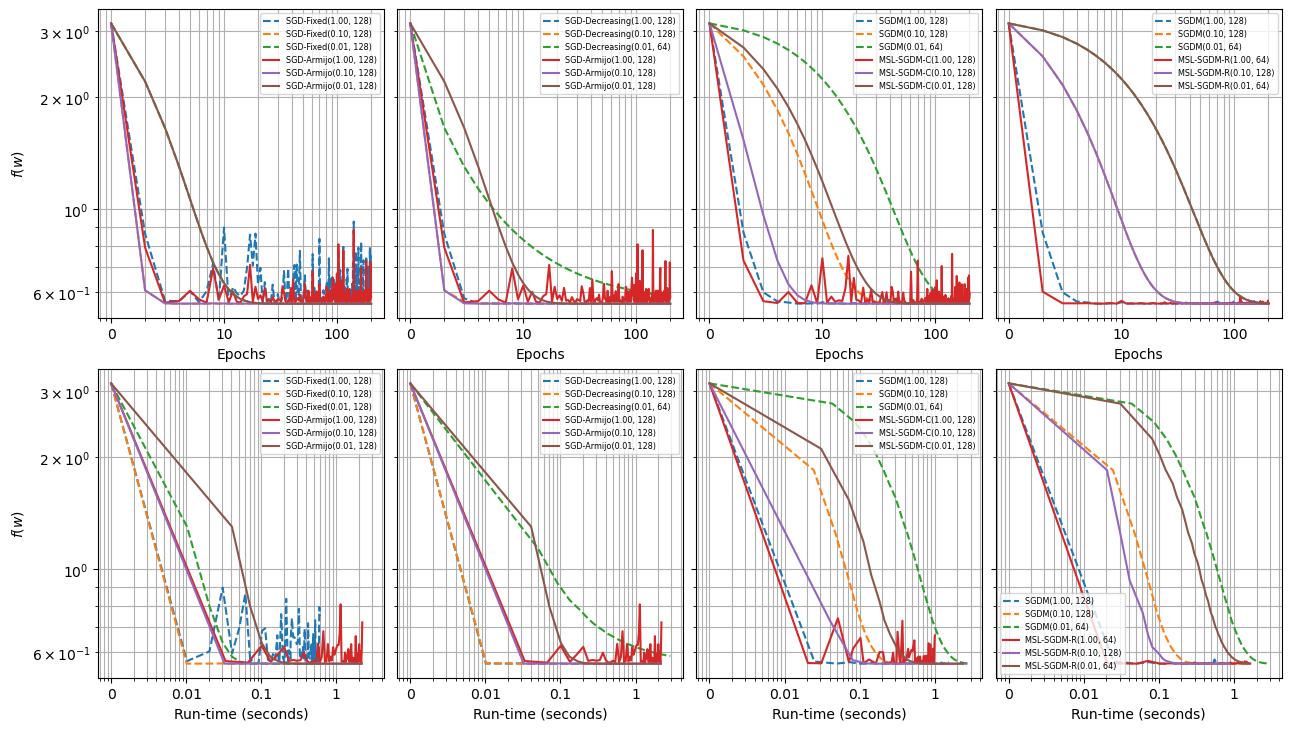

In [87]:
diagnostic([sgdfixed_a4a, sgddecre_a4a, sgdm_a4a, sgdarmijo_a4a, mslc_a4a, mslr_a4a]),
plt.savefig("./plots/a4a-diagnostic.pdf")